## **BÀI TẬP TUẦN 3 - houses_to_rent**

In [7]:
# https://drive.google.com/file/d/18T1F6FxJjfPALZrJjUcwm3j6PXLZqXTj/view?usp=sharing
system("gdown --id 18T1F6FxJjfPALZrJjUcwm3j6PXLZqXTj")

In [136]:
library(tidyverse)
library(data.table)
library(dplyr)
library(purrr)
library(ggplot2)


In [23]:
# Đọc dữ liệu, hiển thị thông tin chung của dữ liệu : head(), tail(), str(), summary() 
df = read.csv('houses_to_rent.csv')

head(df)
tail(df)
str(df)
summary(df)

,X,city,area,rooms,bathroom,parking.spaces,floor,animal,furniture,hoa,rent.amount,property.tax,fire.insurance,total
,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
1,0,1,240,3,3,4,NA,acept,furnished,R$0,"R$8,000","R$1,000",R$121,"R$9,121"
2,1,0,64,2,1,1,10,acept,not furnished,R$540,R$820,R$122,R$11,"R$1,493"
3,2,1,443,5,5,4,3,acept,furnished,"R$4,172","R$7,000","R$1,417",R$89,"R$12,680"
4,3,1,73,2,NA,1,12,acept,not furnished,R$700,"R$1,250",R$150,R$16,"R$2,116"
5,4,1,19,1,NA,0,NA,not acept,not furnished,R$0,"R$1,200",R$41,R$16,"R$1,257"
6,5,1,13,1,NA,0,2,acept,not furnished,R$0,"R$2,200",R$42,R$28,"R$2,270"


,X,city,area,rooms,bathroom,parking.spaces,floor,animal,furniture,hoa,rent.amount,property.tax,fire.insurance,total
,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
6075,6074,0,28,1,1,0,NA,not acept,furnished,R$0,"R$1,390",R$0,R$18,"R$1,408"
6076,6075,1,50,2,1,1,2,acept,not furnished,R$420,"R$1,150",R$0,R$15,"R$1,585"
6077,6076,1,84,2,2,1,16,not acept,furnished,R$768,"R$2,900",R$63,R$37,"R$3,768"
6078,6077,0,48,1,1,0,13,acept,not furnished,R$250,R$950,R$42,R$13,"R$1,255"
6079,6078,1,160,3,2,2,NA,not acept,not furnished,R$0,"R$3,500",R$250,R$53,"R$3,803"
6080,6079,1,60,2,1,1,4,acept,furnished,R$489,"R$1,900",R$0,R$25,"R$2,414"


'data.frame':	6080 obs. of  14 variables:
 $ X             : int  0 1 2 3 4 5 6 7 8 9 ...
 $ city          : int  1 0 1 1 1 1 1 1 1 1 ...
 $ area          : int  240 64 443 73 19 13 55 55 82 32 ...
 $ rooms         : int  3 2 5 2 1 1 1 2 3 1 ...
 $ bathroom      : int  3 1 5 NA NA NA NA NA NA NA ...
 $ parking.spaces: int  4 1 4 1 0 0 1 1 1 1 ...
 $ floor         : int  NA 10 3 12 NA 2 2 2 3 16 ...
 $ animal        : chr  "acept" "acept" "acept" "acept" ...
 $ furniture     : chr  "furnished" "not furnished" "furnished" "not furnished" ...
 $ hoa           : chr  "R$0" "R$540" "R$4,172" "R$700" ...
 $ rent.amount   : chr  "R$8,000" "R$820" "R$7,000" "R$1,250" ...
 $ property.tax  : chr  "R$1,000" "R$122" "R$1,417" "R$150" ...
 $ fire.insurance: chr  "R$121" "R$11" "R$89" "R$16" ...
 $ total         : chr  "R$9,121" "R$1,493" "R$12,680" "R$2,116" ...


       X             city             area             rooms       
 Min.   :   0   Min.   :0.0000   Min.   :   10.0   Min.   : 1.000  
 1st Qu.:1520   1st Qu.:1.0000   1st Qu.:   58.0   1st Qu.: 2.000  
 Median :3040   Median :1.0000   Median :  100.0   Median : 3.000  
 Mean   :3040   Mean   :0.8633   Mean   :  151.2   Mean   : 2.493  
 3rd Qu.:4559   3rd Qu.:1.0000   3rd Qu.:  200.0   3rd Qu.: 3.000  
 Max.   :6079   Max.   :1.0000   Max.   :24606.0   Max.   :10.000  
                                 NA's   :17                        
    bathroom      parking.spaces       floor           animal         
 Min.   : 1.000   Min.   : 0.000   Min.   : 1.000   Length:6080       
 1st Qu.: 1.000   1st Qu.: 1.000   1st Qu.: 3.000   Class :character  
 Median : 2.000   Median : 1.000   Median : 6.000   Mode  :character  
 Mean   : 2.347   Mean   : 1.756   Mean   : 7.621                     
 3rd Qu.: 3.000   3rd Qu.: 2.000   3rd Qu.:11.000                     
 Max.   :10.000   Max.   :12.0

In [14]:
# Cho biết số dòng, số cột của dữ liệu
print(paste('number of rows: ', dim(df)[1]))
print(paste('number of cols: ', dim(df)[2]))

[1] "number of rows:  6080"
[1] "number of cols:  14"


In [49]:
# Cho biết 5 loại rooms xuất hiện nhiều nhất trong dataset (5 loại phòng được chọn thuê nhiều nhất)
df_group = group_by(df, rooms)
head(arrange(summarise(df_group, count_rooms = n()), desc(count_rooms)), 5)

rooms,count_rooms
<int>,<int>
3,1994
2,1621
1,1398
4,879
5,143


In [105]:
# Cho biết các cột có dữ liệu bị thiếu (na). Mỗi cột thiếu bao nhiêu giá trị? Tỷ lệ thiếu (lấy 2 số lẻ)?
# sum(is.na(df))
summarise_all(df, ~ sum(is.na(.)))
count_missing = sapply(df, function(y) sum(length(which(is.na(y)))))
df_count_missing = arrange(filter(data.frame(count_missing), count_missing > 0), desc(count_missing))
df_count_missing$missing_percents = round(df_count_missing$count_missing / dim(df)[1], 4) * 100
df_count_missing

X,city,area,rooms,bathroom,parking.spaces,floor,animal,furniture,hoa,rent.amount,property.tax,fire.insurance,total
<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
0,0,17,0,121,0,1555,0,0,0,0,0,0,0


,count_missing,missing_percents
,<int>,<dbl>
floor,1555,25.58
bathroom,121,1.99
area,17,0.28


In [107]:
# Xóa bỏ các cột property.tax, fire.insurance, total. In head() để xem kết quả. 
names(df)
df = subset(df, select = -c(property.tax, fire.insurance, total) )
names(df)

[1] "X"              "city"           "area"           "rooms"         
 [5] "bathroom"       "parking.spaces" "floor"          "animal"        
 [9] "furniture"      "hoa"            "rent.amount"    "property.tax"  
[13] "fire.insurance" "total"

[1] "X"              "city"           "area"           "rooms"         
 [5] "bathroom"       "parking.spaces" "floor"          "animal"        
 [9] "furniture"      "hoa"            "rent.amount"

In [108]:
head(df)

,X,city,area,rooms,bathroom,parking.spaces,floor,animal,furniture,hoa,rent.amount
,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<chr>,<chr>,<chr>,<chr>
1,0,1,240,3,3,4,NA,acept,furnished,R$0,"R$8,000"
2,1,0,64,2,1,1,10,acept,not furnished,R$540,R$820
3,2,1,443,5,5,4,3,acept,furnished,"R$4,172","R$7,000"
4,3,1,73,2,NA,1,12,acept,not furnished,R$700,"R$1,250"
5,4,1,19,1,NA,0,NA,not acept,not furnished,R$0,"R$1,200"
6,5,1,13,1,NA,0,2,acept,not furnished,R$0,"R$2,200"


In [184]:
# Tạo cột rent_amount từ cột rent.amount. 
# Sau đó, bỏ ký tự "R$", và ',' ở rent_amount và đổi dữ liệu của cột này sang kiểu số. In head() để xem kết quả.
df$rent_amount = substr(df$rent.amount, 3, nchar(df$rent.amount))
df$rent_amount = as.integer(str_replace(df$rent_amount, ',', ''))

typeof(df$rent_amount)
head(df)


[1] "integer"

,X,city,area,rooms,bathroom,parking.spaces,floor,animal,furniture,hoa,rent.amount,rent_amount
,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<chr>,<chr>,<chr>,<chr>,<int>
1,0,1,240,3,3,4,NA,acept,furnished,R$0,"R$8,000",8000
2,1,0,64,2,1,1,10,acept,not furnished,R$540,R$820,820
3,2,1,443,5,5,4,3,acept,furnished,"R$4,172","R$7,000",7000
4,3,1,73,2,NA,1,12,acept,not furnished,R$700,"R$1,250",1250
5,4,1,19,1,NA,0,NA,not acept,not furnished,R$0,"R$1,200",1200
6,5,1,13,1,NA,0,2,acept,not furnished,R$0,"R$2,200",2200


In [185]:
# Cho biết bao nhiêu nhà có nội thất, bao nhiêu nhà không có nội thất? 
df_group_2 = group_by(df, furniture)
summarise(df_group_2, counts = n())

# Trong nhà có nội thất bao nhiêu nhà cho phép nuôi thú, bao nhiêu nhà không? 
# Trong nhà không có nội thất, bao nhiêu nhà cho phép nuôi thú, bao nhiêu nhà không?
df_group_3 = group_by(df, furniture, animal)
summarise(df_group_3, counts = n())


furniture,counts
<chr>,<int>
furnished,1582
not furnished,4498


`summarise()` has grouped output by 'furniture'. You can override using the
`.groups` argument.


furniture,animal,counts
<chr>,<chr>,<int>
furnished,acept,1130
furnished,not acept,452
not furnished,acept,3536
not furnished,not acept,962


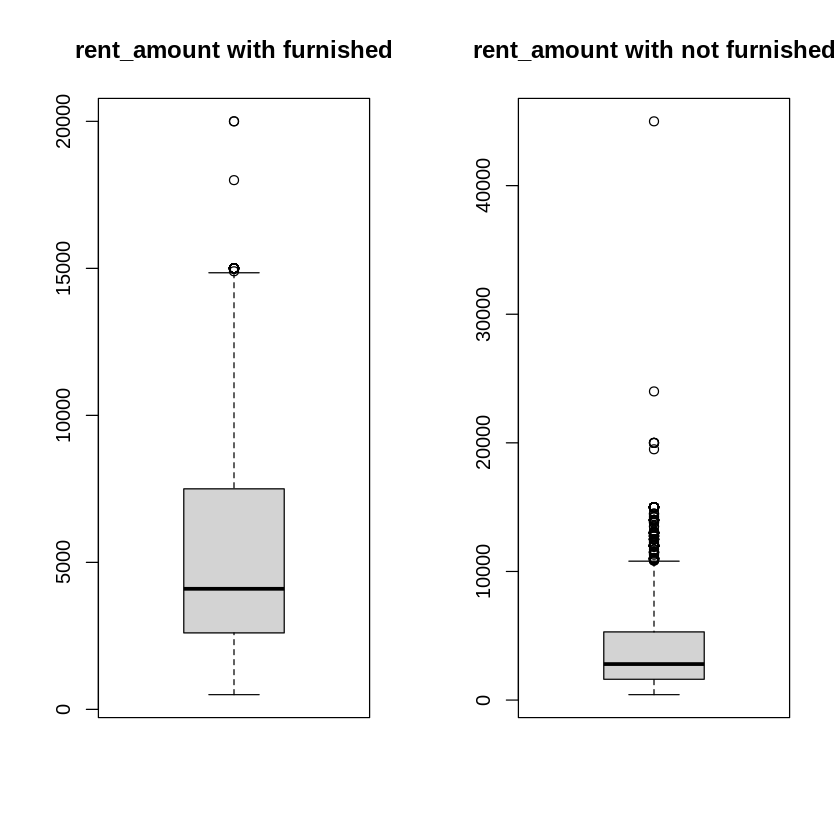

In [186]:
# Vẽ boxplot của cột rent_amount theo furniture và nhận xét. 
df_furnished = filter(df, furniture == 'furnished')
df_not_furnished = filter(df, furniture == 'not furnished')


par(mfcol = c(1,2))
boxplot(df_furnished$rent_amount, main = "rent_amount with furnished")
boxplot(df_not_furnished$rent_amount, main = "rent_amount with not furnished")


### Nhận xét:
- Quan sát biểu đồ boxplot, ta thấy rent_amount with furnished có ít ouliers hơn so với rent_amount with not furnished.
- Về cơ bản, các điểm dữ liệu có phân phối về giá trị về rent_amount with furnished nhiều hơn so với rent_amount with not furnished

In [187]:
# Cột area có các giá trị na, hãy thay thế các giá trị na bằng giá trị median.
df$area[is.na(df$area)] = median(df$area, na.rm=TRUE)


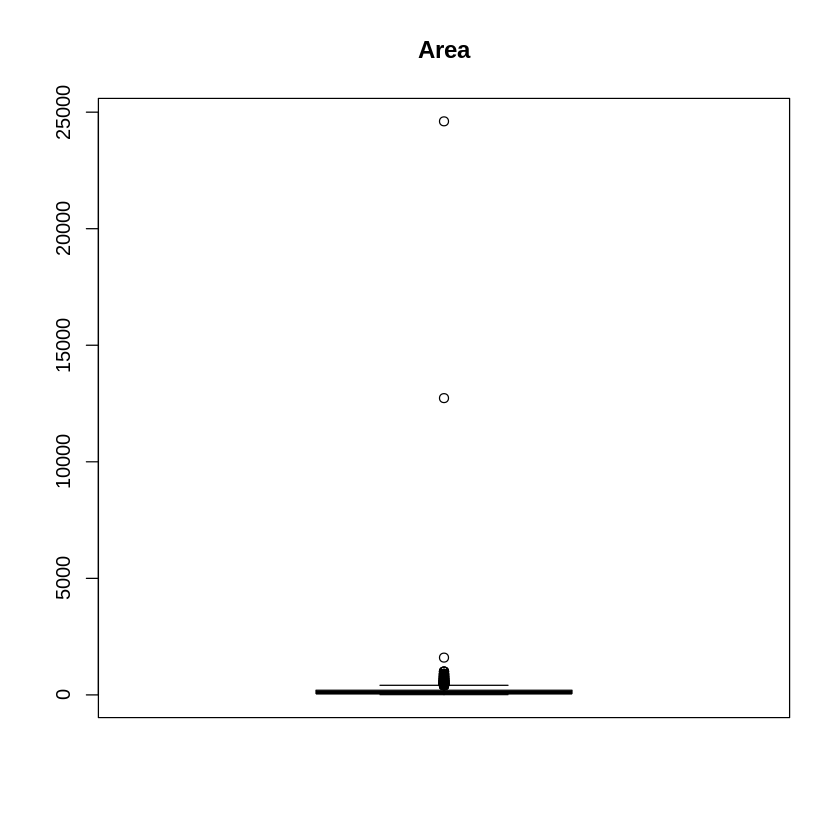

In [188]:
# Vẽ boxplot của cột area và nhận xét. Cột area có outlier không? Nếu có cho biết tổng số mẫu outlier.
boxplot(df$area, main = "Area")

In [189]:
num_ouliers = length(boxplot.stats(df$area)$out)
print(paste('data with area outliers: ', length(df$area)))
print(paste('data with out area outliers: ', length(df$area) - num_ouliers))
print(paste('number of outliers: ', num_ouliers))


[1] "data with area outliers:  6080"
[1] "data with out area outliers:  5835"
[1] "number of outliers:  245"


[1] 0.2356958


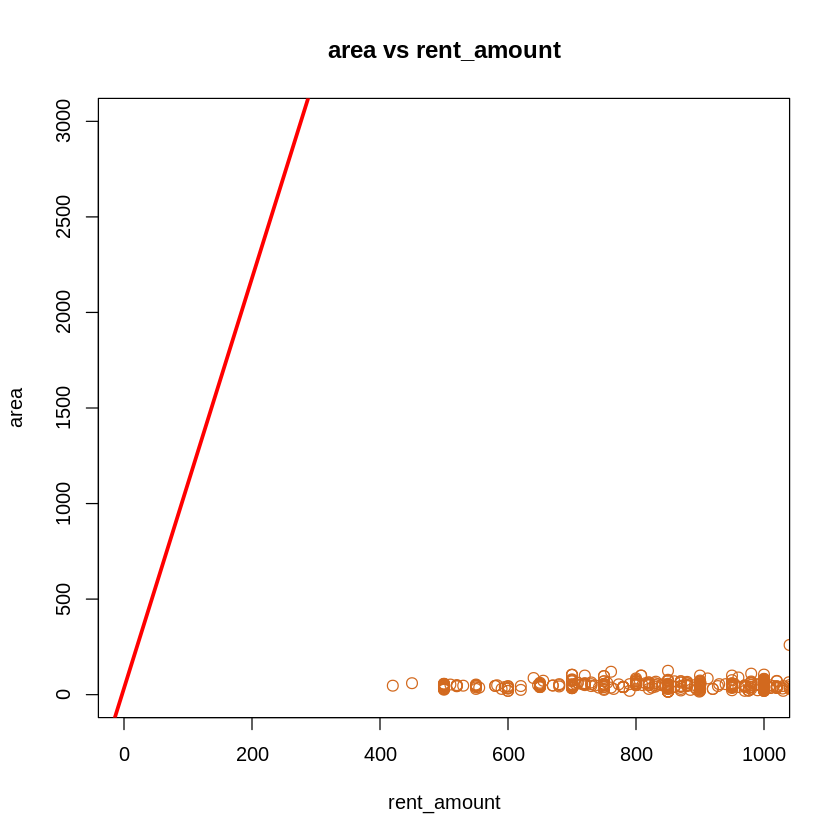

In [190]:
# Vẽ biểu đồ thể hiện mối liên hệ của area và rent_amount
plot(df$rent_amount, df$area,
    main = "area vs rent_amount",
    xlab = "rent_amount",
    ylab = "area",
    col = "chocolate", 
    cex = 1.2, 
    xlim = c(0, 1000), 
    ylim = c(0, 3000)
)

#Linear Regression Line
abline(lm(faithful$waiting~faithful$eruptions), col = "red", lwd = 3)

print(cor(df$rent_amount, df$area))

### Nhận xét:
area và rent_amount không có tương quan với nhau

In [191]:
head(df)

,X,city,area,rooms,bathroom,parking.spaces,floor,animal,furniture,hoa,rent.amount,rent_amount
,<int>,<int>,<dbl>,<int>,<int>,<int>,<int>,<chr>,<chr>,<chr>,<chr>,<int>
1,0,1,240,3,3,4,NA,acept,furnished,R$0,"R$8,000",8000
2,1,0,64,2,1,1,10,acept,not furnished,R$540,R$820,820
3,2,1,443,5,5,4,3,acept,furnished,"R$4,172","R$7,000",7000
4,3,1,73,2,NA,1,12,acept,not furnished,R$700,"R$1,250",1250
5,4,1,19,1,NA,0,NA,not acept,not furnished,R$0,"R$1,200",1200
6,5,1,13,1,NA,0,2,acept,not furnished,R$0,"R$2,200",2200


null device 
          1

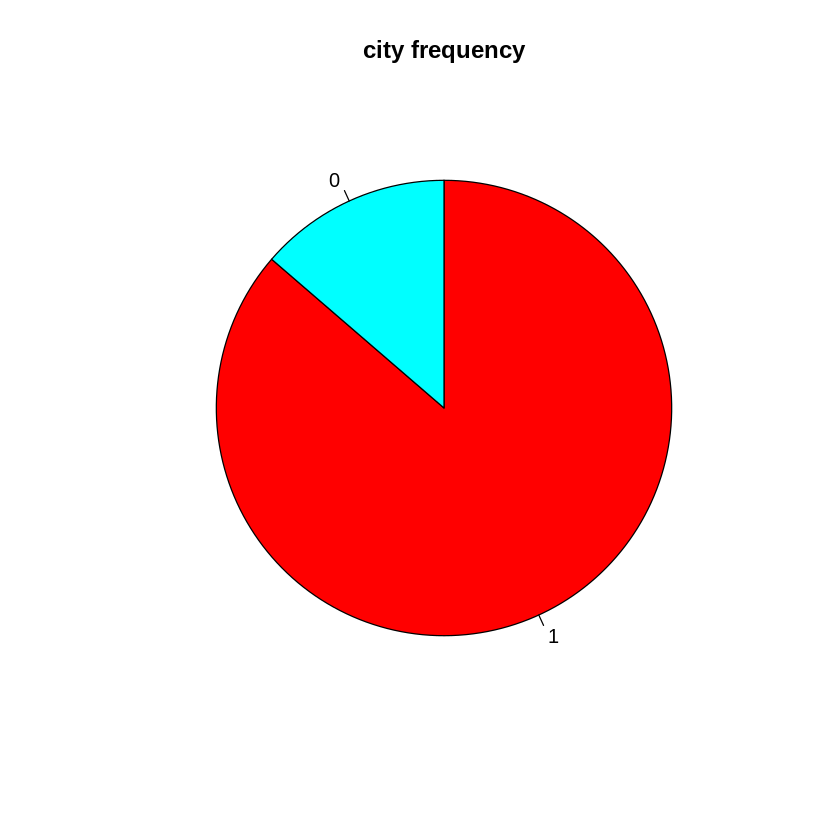

In [192]:
# Vẽ pie chart thể hiện % giữa 1 và 0 của cột city. 
x1 = dim(filter(df, city == 1))[1]
x2 = dim(filter(df, city == 0))[1]
x = c(x1, x2)
y = c(1, 0)
pie(x, y, col = rainbow(length(x)), main = 'city frequency', clockwise = TRUE)
dev.off() 

In [193]:
# Cho biết rent_amount lớn nhất và bé nhất? Liệt kê những căn nhà có rent_amount lớn nhất và bé nhất.
print(paste('maximum of rent_amount: ', max(df$rent_amount)))
print(paste('minimum of rent_amount: ', min(df$rent_amount)))
filter(df, rent_amount == max(df$rent_amount))
filter(df, rent_amount == min(df$rent_amount))

[1] "maximum of rent_amount:  45000"
[1] "minimum of rent_amount:  420"


X,city,area,rooms,bathroom,parking.spaces,floor,animal,furniture,hoa,rent.amount,rent_amount
<int>,<int>,<dbl>,<int>,<int>,<int>,<int>,<chr>,<chr>,<chr>,<chr>,<int>
3381,1,700,4,7,8,NA,acept,not furnished,R$0,"R$45,000",45000


X,city,area,rooms,bathroom,parking.spaces,floor,animal,furniture,hoa,rent.amount,rent_amount
<int>,<int>,<dbl>,<int>,<int>,<int>,<int>,<chr>,<chr>,<chr>,<chr>,<int>
2662,0,47,1,1,0,2,acept,not furnished,R$426,R$420,420


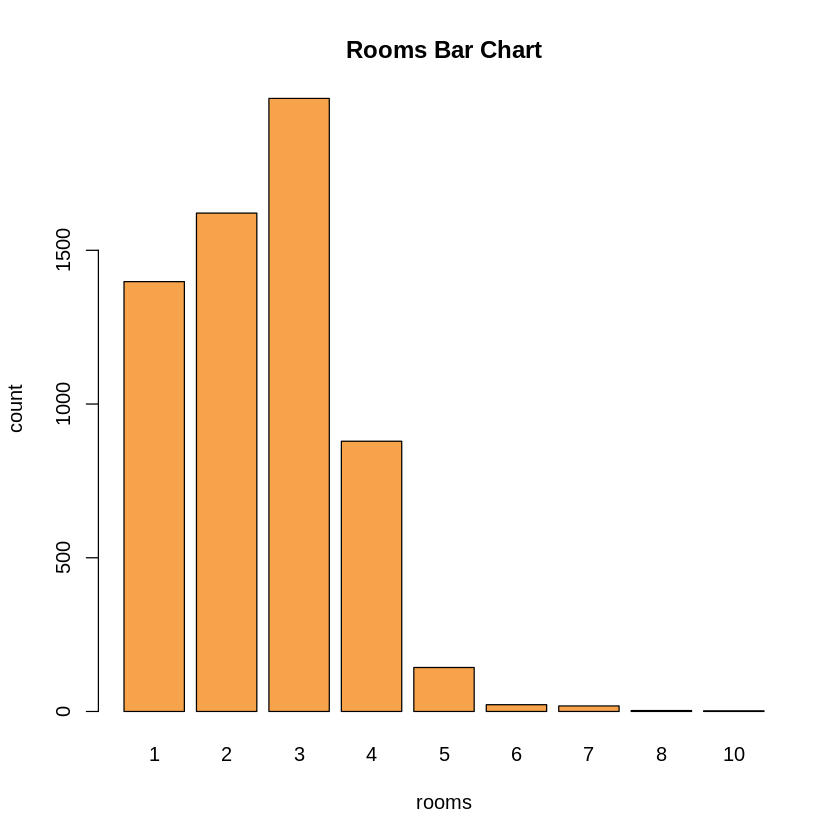

In [197]:
# Vẽ biểu đồ thống kê rooms
df_group = group_by(df, rooms)
df_room = summarise(df_group, count = n())

barplot(df_room$count, names.arg = df_room$rooms,
        xlab = "rooms",ylab = "count", col = "#f7a34c",
        main = "Rooms Bar Chart")